In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MultiLabelBinarizer
import re

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Animes.csv')
df

,position,title,episodes,release_date,members,score,details,broadcast,studios,source,genres,themes,demographic,popularity
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Sundays at 17:00 (JST),Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,Saturdays at 00:00 (JST),A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Tuesdays at 00:00 (JST),Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Wednesdays at 18:00 (JST),Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,Wednesdays at 02:05 (JST),White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23065,NaN,Isaku: Tsumi to Batsu,Special (1 eps),Mar 1999 - Mar 1999,390,0.00,https://myanimelist.net/anime/43015/Isaku__Tsu...,NaN,Studio Kyuuma,Visual,NaN,NaN,NaN,15105
23066,NaN,Isekai Kita node Sukebe Skill de Zenryoku Ouka...,OVA (? eps),Dec 2022 -,448,0.00,https://myanimelist.net/anime/53204/Isekai_Kit...,NaN,Shion,Manga,NaN,NaN,NaN,14519
23067,NaN,Ke Ai,Movie (1 eps),Dec 2018 - Dec 2018,81,0.00,https://myanimelist.net/anime/52630/Ke_Ai,NaN,add some,Original,"Avant Garde, Drama, Erotica",NaN,NaN,19681
23068,NaN,Yari Agari,OVA (? eps),Jan 2023 -,93,0.00,https://myanimelist.net/anime/53506/Yari_Agari,NaN,add some,Original,NaN,NaN,NaN,19474


In [ ]:
df.isnull().sum()

position         1920
title               0
episodes            0
release_date        0
members             0
score               0
details             0
broadcast       15832
studios             0
source              0
genres          12461
themes          10527
demographic     14016
popularity          0
dtype: int64

In [ ]:
df.describe()

,position,members,score,popularity
count,21150.000000,2.307000e+04,23070.000000,23070.000000
mean,10579.527896,3.715924e+04,4.116137,11538.897659
std,6109.065325,1.533924e+05,3.165004,6662.519507
min,1.000000,0.000000e+00,0.000000,1.000000
25%,5289.250000,2.280000e+02,0.000000,5770.250000
50%,10576.500000,1.205000e+03,5.700000,11537.500000
75%,15871.750000,9.979750e+03,6.680000,17307.000000
max,21160.000000,3.562726e+06,9.120000,23080.000000


In [ ]:
df['episodes']

0            TV (64 eps)
1            TV (13 eps)
2             TV (? eps)
3            TV (51 eps)
4            TV (24 eps)
              ...       
23065    Special (1 eps)
23066        OVA (? eps)
23067      Movie (1 eps)
23068        OVA (? eps)
23069      Movie (1 eps)
Name: episodes, Length: 23070, dtype: object

In [ ]:
# Extracting type and number_of_episodes
df['type'] = df['episodes'].str.extract(r'(^[\w\s]+)')
df['number_of_episodes'] = df['episodes'].str.extract(r'\((\?|\d+)\s*eps\)')
df

,position,title,episodes,release_date,members,score,details,broadcast,studios,source,genres,themes,demographic,popularity,type,number_of_episodes
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Sundays at 17:00 (JST),Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,Saturdays at 00:00 (JST),A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Tuesdays at 00:00 (JST),Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748,TV,?
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Wednesdays at 18:00 (JST),Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,Wednesdays at 02:05 (JST),White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13,TV,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23065,NaN,Isaku: Tsumi to Batsu,Special (1 eps),Mar 1999 - Mar 1999,390,0.00,https://myanimelist.net/anime/43015/Isaku__Tsu...,NaN,Studio Kyuuma,Visual,NaN,NaN,NaN,15105,Special,1
23066,NaN,Isekai Kita node Sukebe Skill de Zenryoku Ouka...,OVA (? eps),Dec 2022 -,448,0.00,https://myanimelist.net/anime/53204/Isekai_Kit...,NaN,Shion,Manga,NaN,NaN,NaN,14519,OVA,?
23067,NaN,Ke Ai,Movie (1 eps),Dec 2018 - Dec 2018,81,0.00,https://myanimelist.net/anime/52630/Ke_Ai,NaN,add some,Original,"Avant Garde, Drama, Erotica",NaN,NaN,19681,Movie,1
23068,NaN,Yari Agari,OVA (? eps),Jan 2023 -,93,0.00,https://myanimelist.net/anime/53506/Yari_Agari,NaN,add some,Original,NaN,NaN,NaN,19474,OVA,?


In [ ]:
df.drop(columns = ['episodes'], inplace = True)
df['details'].value_counts()

details
https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood              1
https://myanimelist.net/anime/35098/San_Tarou_to_Kaguya-hime_no_Koutsuu_Anzen    1
https://myanimelist.net/anime/43544/San_Shi_Liu_Ge_Zi                            1
https://myanimelist.net/anime/43255/San_Mao_Qiyu_Ji                              1
https://myanimelist.net/anime/43257/San_Mao_Luxing_Ji                            1
                                                                                ..
https://myanimelist.net/anime/31050/Cyborg_009_VS_Devilman                       1
https://myanimelist.net/anime/35805/Cinderella_Girls_Gekijou_Specials            1
https://myanimelist.net/anime/1701/Boku_no_Marie                                 1
https://myanimelist.net/anime/5539/Blassreiter__Navi                             1
https://myanimelist.net/anime/53027/Yuwang_Jungle                                1
Name: count, Length: 23070, dtype: int64

In [ ]:
df1 = df.copy()
# df1.drop(columns = ['details'],inplace =True)

In [ ]:
# df1.set_index('title', inplace = True)
# df.head()

In [ ]:
df1['broadcast'].value_counts()

broadcast
Unknown                        4040
Not scheduled once per week      98
Sundays at 00:00 (JST)           46
Sundays at 08:30 (JST)           43
Sundays at 00:30 (JST)           36
                               ... 
Fridays at 16:30 (JST)            1
Fridays at 22:40 (JST)            1
Fridays at 13:30 (JST)            1
Wednesdays at 11:30 (JST)         1
Thursdays at 16:40 (JST)          1
Name: count, Length: 574, dtype: int64

In [ ]:
df1['demographic'].value_counts()

demographic
Kids       5424
Shounen    1965
Seinen      913
Shoujo      649
Josei       103
Name: count, dtype: int64

In [ ]:
df1['broadcast'].fillna('Unknown', inplace=True)

# Extracting day and time
df1['day'] = df1['broadcast'].str.extract(r'(\w+days)')
df1['time'] = df1['broadcast'].str.extract(r'at (\d{2}:\d{2})')

# Handling 'Unknown' and 'Not scheduled once per week' cases
df1.loc[df1['broadcast'].str.contains('Unknown'), ['day', 'time']] = 'Unknown', 'Unknown'
df1.loc[df1['broadcast'].str.contains('Not scheduled once per week'), ['day', 'time']] = 'Not scheduled', 'Not scheduled'
df1[['day','time']].value_counts()

day            time         
Unknown        Unknown          19962
Not scheduled  Not scheduled       98
Sundays        00:00               46
               08:30               43
               00:30               36
                                ...  
               02:35                1
               02:29                1
               02:10                1
               01:57                1
Wednesdays     23:55                1
Name: count, Length: 567, dtype: int64

In [ ]:
df1['source'].value_counts()

source
Original    8474
Manga       4449
Unknown     3786
Game        1107
Visual      1095
Other        921
Light        918
Novel        669
Web          413
Music        362
4-koma       309
Picture      195
Book         171
Mixed        122
Card          66
Radio         13
Name: count, dtype: int64

In [ ]:
df1.drop(columns = ['broadcast'], inplace = True)
df1['genres'].value_counts()

genres
Comedy, Slice of Life                                        548
Adventure, Fantasy                                           518
Action, Sci-Fi                                               476
Comedy, Fantasy                                              375
Action, Adventure, Fantasy                                   350
                                                            ... 
Action, Adventure, Fantasy, Horror, Romance                    1
Action, Adventure, Comedy, Drama, Fantasy, Romance, Ecchi      1
Comedy, Romance, Slice of Life, Supernatural                   1
Adventure, Horror, Suspense                                    1
Avant Garde, Drama, Erotica                                    1
Name: count, Length: 982, dtype: int64

In [ ]:
df1['start_date'] = df1['release_date'].apply(lambda x: x.split(' - ')[0].strip())
# Remove hyphens from the 'start_date' column
df1['start_date'] = df1['start_date'].str.replace(' -', '')
df1['end_date'] = df1['release_date'].apply(lambda x: x.split(' - ')[1].strip() if ' - ' in x else 'Unknown')
df1['start_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23070 entries, 0 to 23069
Series name: start_date
Non-Null Count  Dtype 
--------------  ----- 
23070 non-null  object
dtypes: object(1)
memory usage: 180.4+ KB


In [ ]:
df1['start_date'].unique()

array(['Apr 2009', 'Apr 2022', 'Oct 2022', 'Apr 2015', 'Apr 2011',
       'Apr 2019', 'Jan 2021', 'Oct 2012', 'Oct 2011', 'Jan 1988',
       'Apr 2021', 'Jan 2017', 'Oct 2017', 'Sep 2016', 'Oct 2008',
       'Apr 2006', 'Sep 2020', 'Jul 2013', 'Apr 2008', 'Aug 2017',
       'Jul 2018', 'Aug 2016', 'Apr 2004', 'Dec 2021', 'Apr 2020',
       'Dec 2020', 'Jan 2019', 'Jan 2018', 'Oct 2016', 'Jan 2022',
       'Jul 2001', 'Apr 1998', 'Oct 2000', 'Oct 2014', 'Jul 2019',
       'Jul 2022', 'Oct 2021', 'Feb 1999', 'Oct 1980', 'Oct 2006',
       'Aug 2020', 'Apr 2014', 'Jun 1999', 'Sep 2022', 'Jul 2017',
       'Jul 1997', 'Oct 2005', 'Oct 1999', 'Aug 2021', 'Jan 2009',
       'Nov 2004', 'Oct 2020', 'Jan 2020', 'Jan 2012', 'Oct 2015',
       'Mar 2021', 'Apr 2007', 'Apr 2017', 'Jun 2019', 'Feb 2010',
       'May 2015', 'Jul 2012', 'Oct 2013', 'Oct 2018', 'Jul 2011',
       'Jan 2016', 'Apr 2010', 'Apr 2012', 'Sep 2018', 'Jun 2021',
       'Oct 1997', 'Jan 2014', 'Oct 1993', 'Feb 1998', 'Apr 20

In [ ]:
df1[['start_date', 'end_date', 'release_date']].isnull().sum()

start_date      0
end_date        0
release_date    0
dtype: int64

In [ ]:
def parse_date(date_str):
    # date_str = date_str.strip()
    if date_str == '-' or date_str == '':
        return 'no date'
    if len(date_str)>5:
      return pd.to_datetime(date_str, format='%b %Y', errors='coerce')
    elif len(date_str)<=5:
      return pd.to_datetime(date_str, format='%Y', errors='coerce')
    else:
      return 'unknown format'
    # try:
    #     return pd.to_datetime(date_str, format='%b %Y', errors='coerce')
    # except ValueError:
    #     try:
    #         return pd.to_datetime(date_str, format='%Y', errors='coerce')
    #     except ValueError:
    #         return 'unknown format'

df1['start_date'] = df1['start_date'].apply(parse_date)
df1['end_date'] = df1['end_date'].apply(parse_date)
df1[['start_date', 'end_date', 'release_date']].isnull().sum()

start_date         0
end_date        2566
release_date       0
dtype: int64

In [ ]:
df1['start_date'].unique()

array([Timestamp('2009-04-01 00:00:00'), Timestamp('2022-04-01 00:00:00'),
       Timestamp('2022-10-01 00:00:00'), Timestamp('2015-04-01 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2019-04-01 00:00:00'),
       Timestamp('2021-01-01 00:00:00'), Timestamp('2012-10-01 00:00:00'),
       Timestamp('2011-10-01 00:00:00'), Timestamp('1988-01-01 00:00:00'),
       Timestamp('2021-04-01 00:00:00'), Timestamp('2017-01-01 00:00:00'),
       Timestamp('2017-10-01 00:00:00'), Timestamp('2016-09-01 00:00:00'),
       Timestamp('2008-10-01 00:00:00'), Timestamp('2006-04-01 00:00:00'),
       Timestamp('2020-09-01 00:00:00'), Timestamp('2013-07-01 00:00:00'),
       Timestamp('2008-04-01 00:00:00'), Timestamp('2017-08-01 00:00:00'),
       Timestamp('2018-07-01 00:00:00'), Timestamp('2016-08-01 00:00:00'),
       Timestamp('2004-04-01 00:00:00'), Timestamp('2021-12-01 00:00:00'),
       Timestamp('2020-04-01 00:00:00'), Timestamp('2020-12-01 00:00:00'),
       Timestamp('2019-01

In [ ]:
# Function to calculate duration
def calculate_duration(row):
    start_date = row['start_date']
    end_date = row['end_date']

    if start_date in ['no date'] or end_date in ['no date']:
        return 'Unknown'

    if pd.isna(start_date) or pd.isna(end_date):
        return 'Invalid dates'

    if start_date == end_date:
        return 'Released at once'

    if end_date == 'Unknown':
        return 'On going'

    # Handle cases where only years are present
    if start_date.year and end_date.year and start_date.month == pd.NaT and end_date.month == pd.NaT:
        duration_years = end_date.year - start_date.year
        return f'{duration_years * 12} months'

    # Handle cases where both month and year are present
    if end_date.year < start_date.year or (end_date.year == start_date.year and end_date.month < start_date.month):
        return 'Invalid dates'

    duration_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    return f'{duration_months} months'

# Apply the function to each row
df1['duration'] = df1.apply(calculate_duration, axis=1)
# df1.loc[df1['duration'] == 'Invalid dates', ['start_date', 'end_date']] = np.nan
# df1['start_date'] = df1['start_date'].apply(parse_dates)
# df1['end_date_dt'] = df1['end_date'].apply(parse_dates)
# df1['start_month'] = df1['start_date_dt'].dt.month
# df1['start_year'] = df1['start_date_dt'].dt.year
# df1['end_month'] = df1['end_date_dt'].dt.month
# df1['end_year'] = df1['end_date_dt'].dt.year
# df1.drop(columns=['start_date_dt', 'end_date_dt', 'start_date', 'end_date', 'release_date'], inplace = True)
df1.head()

,position,title,release_date,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,day,time,start_date,end_date,duration
0,1.0,Fullmetal Alchemist: Brotherhood,Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,Sundays,17:00,2009-04-01 00:00:00,2010-07-01,15 months
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,Saturdays,00:00,2022-04-01 00:00:00,2022-06-01,2 months
2,3.0,Bleach: Sennen Kessen-hen,Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748,TV,?,Tuesdays,00:00,2022-10-01 00:00:00,NaT,Invalid dates
3,4.0,Gintama°,Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,Wednesdays,18:00,2015-04-01 00:00:00,2016-03-01,11 months
4,5.0,Steins;Gate,Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13,TV,24,Wednesdays,02:05,2011-04-01 00:00:00,2011-09-01,5 months


In [ ]:
df1[['start_date', 'end_date', 'duration', 'release_date']].isnull().sum()

start_date         0
end_date        2566
duration           0
release_date       0
dtype: int64

In [ ]:
df1['start_date'].unique()

array([Timestamp('2009-04-01 00:00:00'), Timestamp('2022-04-01 00:00:00'),
       Timestamp('2022-10-01 00:00:00'), Timestamp('2015-04-01 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2019-04-01 00:00:00'),
       Timestamp('2021-01-01 00:00:00'), Timestamp('2012-10-01 00:00:00'),
       Timestamp('2011-10-01 00:00:00'), Timestamp('1988-01-01 00:00:00'),
       Timestamp('2021-04-01 00:00:00'), Timestamp('2017-01-01 00:00:00'),
       Timestamp('2017-10-01 00:00:00'), Timestamp('2016-09-01 00:00:00'),
       Timestamp('2008-10-01 00:00:00'), Timestamp('2006-04-01 00:00:00'),
       Timestamp('2020-09-01 00:00:00'), Timestamp('2013-07-01 00:00:00'),
       Timestamp('2008-04-01 00:00:00'), Timestamp('2017-08-01 00:00:00'),
       Timestamp('2018-07-01 00:00:00'), Timestamp('2016-08-01 00:00:00'),
       Timestamp('2004-04-01 00:00:00'), Timestamp('2021-12-01 00:00:00'),
       Timestamp('2020-04-01 00:00:00'), Timestamp('2020-12-01 00:00:00'),
       Timestamp('2019-01

In [ ]:
# apply(lambda x: parse_date(x.split(' - ')[1].strip(), 'year') if ' - ' in x else 'Unknown')
# df1['end_month'] = df1['end_date'].dt.month
# df1['end_year'] = df1['end_date'].dt.year
# Convert 'start_date' to datetime if it's in string format
df1['start_date'] = pd.to_datetime(df1['start_date'], errors='coerce')

# Apply the lambda function to create 'start_month' and 'start_year' columns
df1['start_month'] = df1['start_date'].dt.month
df1['start_year'] = df1['start_date'].dt.year

# For entries where 'no date' is present or where 'start_date' is missing, set 'start_month' and 'start_year' to NaN
df1.loc[df1['start_date'].isnull(), ['start_month', 'start_year']] = np.nan

# Display unique start months
df1['start_month'].unique()

array([ 4., 10.,  1.,  9.,  7.,  8., 12.,  2.,  6., 11.,  3.,  5., nan])

In [ ]:
df1['end_date'] = pd.to_datetime(df1['end_date'], errors='coerce')

# Apply the lambda function to create 'start_month' and 'start_year' columns
df1['end_month'] = df1['end_date'].dt.month
df1['end_year'] = df1['end_date'].dt.year

# For entries where 'no date' is present or where 'start_date' is missing, set 'start_month' and 'start_year' to NaN
df1.loc[df1['end_date'].isnull(), ['end_month', 'end_year']] = np.nan

# Display unique start months
df1['end_month'].unique()

array([ 7.,  6., nan,  3.,  9.,  1.,  8., 10.,  2.,  4., 12., 11.,  5.])

In [ ]:
df1.isnull().sum()

position               1920
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes        0
day                       0
time                      0
start_date              780
end_date               2566
duration                  0
start_month             780
start_year              780
end_month              2566
end_year               2566
dtype: int64

In [ ]:
df1.drop(columns = ['start_date', 'end_date', 'end_month', 'end_year'], inplace = True)
df1.isnull().sum()

position               1920
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes        0
day                       0
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
# from sklearn.preprocessing import MultiLabelBinarizer
# df1['genres'].fillna('Unknown', inplace=True)
# df1['genres'] = df1['genres'].str.split(', ')

# # Initialize the MultiLabelBinarizer
# mlb = MultiLabelBinarizer()

# # Fit and transform the data
# one_hot_genres = mlb.fit_transform(df1['genres'])

# # Create a DataFrame with the one-hot encoded data
# one_hot_df = pd.DataFrame(one_hot_genres, columns=mlb.classes_)

# # Concatenate the one-hot encoded DataFrame with the original DataFrame
# df1 = pd.concat([df1, one_hot_df], axis=1)
# df1

In [ ]:
# df1.drop(columns = ['genres'], inplace=True)

In [ ]:
df1.isnull().sum()

position               1920
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes        0
day                       0
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1.isnull().sum()

position               1920
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes        0
day                       0
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1['time'] = df1['time'].replace('Unknown', np.nan)
df1['duration'] = df1['duration'].replace('Released at once', 0)
df1['day'] = df1['day'].replace('Unknown', np.nan)
df1['source'] = df1['source'].replace('Unknown', np.nan)
df1['number_of_episodes'] = df1['number_of_episodes'].replace('?', np.nan)
df1['type'] = df1['type'].replace('Unknown', np.nan)
df1['time'] = df1['time'].replace('Not scheduled', np.nan)
df1['duration'] = df1['duration'].replace('Invalid dates', np.nan)
# df2['time'] = str(df2['time'])
def convert_time_format(time_str):
    if time_str == '00:00':
        return '2400'
    else:
        return time_str.replace(':', '')

# Apply the function to the 'time' column
df1['time'] = df1['time'].astype(str).apply(convert_time_format)
df1.head()

,position,title,release_date,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,day,time,duration,start_month,start_year
0,1.0,Fullmetal Alchemist: Brotherhood,Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,Sundays,1700,15 months,4.0,2009.0
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,Saturdays,2400,2 months,4.0,2022.0
2,3.0,Bleach: Sennen Kessen-hen,Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748,TV,NaN,Tuesdays,2400,NaN,10.0,2022.0
3,4.0,Gintama°,Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,Wednesdays,1800,11 months,4.0,2015.0
4,5.0,Steins;Gate,Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13,TV,24,Wednesdays,0205,5 months,4.0,2011.0


In [ ]:
# df1.set_index('title', inplace = True)
# df1.info()

<Axes: xlabel='members', ylabel='Count'>

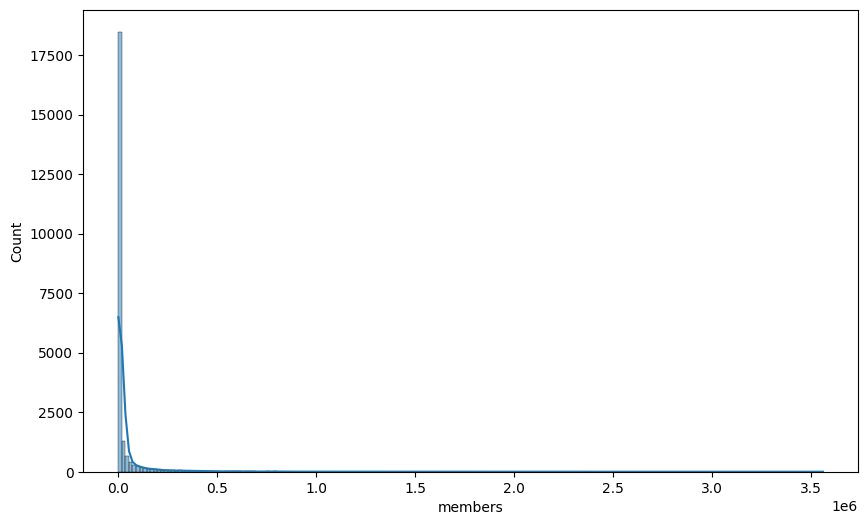

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['members'], bins=200, kde=True, edgecolor='black')

In [ ]:
df1['duration'].value_counts()

duration
0             11481
2 months       2540
5 months       1163
3 months        973
Unknown         780
              ...  
171 months        1
135 months        1
65 months         1
221 months        1
103 months        1
Name: count, Length: 120, dtype: int64

In [ ]:
def categorize_duration(duration):
    if duration == 'On going':
        return 'On going'
    elif duration == 0:
        return '0 months'
    elif pd.isna(duration):
        return 'Unknown'
    else:
        return pd.cut([duration], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, np.inf],
                      labels=['0-6 months', '6-12 months', '12-18 months', '18-24 months', '24-30 months',
                              '30-36 months', '36-42 months', '42-48 months', '48-54 months', '54-60 months',
                              '60+ months'])[0]

# Apply the function to the 'duration' column
df1['duration'] = df1['duration'].apply(categorize_duration)
df1['duration'].value_counts()

duration
0 months        11481
18-24 months     2787
0-6 months       1954
Unknown          1864
60+ months       1505
48-54 months     1192
24-30 months     1088
54-60 months      597
36-42 months      478
30-36 months       85
42-48 months       39
Name: count, dtype: int64

In [ ]:
df1.head()

,position,title,release_date,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,day,time,duration,start_month,start_year
0,1.0,Fullmetal Alchemist: Brotherhood,Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,Sundays,1700,0-6 months,4.0,2009.0
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,Saturdays,2400,18-24 months,4.0,2022.0
2,3.0,Bleach: Sennen Kessen-hen,Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748,TV,NaN,Tuesdays,2400,Unknown,10.0,2022.0
3,4.0,Gintama°,Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,Wednesdays,1800,0-6 months,4.0,2015.0
4,5.0,Steins;Gate,Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13,TV,24,Wednesdays,0205,48-54 months,4.0,2011.0


In [ ]:
# df1.drop(columns = ['end_month', 'end_year'], inplace = True)
# df1.head()

In [ ]:
df1['number_of_episodes'].value_counts()

number_of_episodes
1      10463
12      1797
2       1490
26      1147
13       941
       ...  
510        1
139        1
163        1
530        1
196        1
Name: count, Length: 245, dtype: int64

<Axes: xlabel='number_of_episodes', ylabel='Count'>

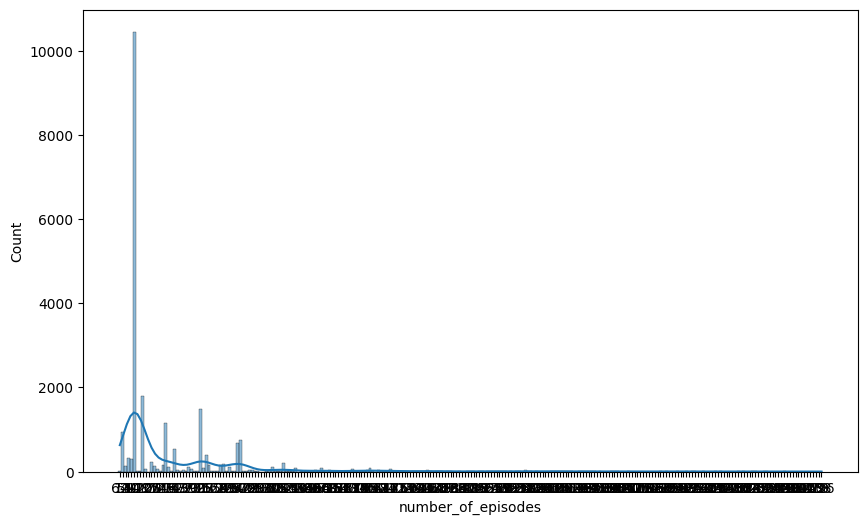

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['number_of_episodes'], bins=200, kde=True, edgecolor='black')

In [ ]:
df1.head()

,position,title,release_date,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,day,time,duration,start_month,start_year
0,1.0,Fullmetal Alchemist: Brotherhood,Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,Sundays,1700,0-6 months,4.0,2009.0
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,Saturdays,2400,18-24 months,4.0,2022.0
2,3.0,Bleach: Sennen Kessen-hen,Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748,TV,NaN,Tuesdays,2400,Unknown,10.0,2022.0
3,4.0,Gintama°,Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,Wednesdays,1800,0-6 months,4.0,2015.0
4,5.0,Steins;Gate,Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13,TV,24,Wednesdays,0205,48-54 months,4.0,2011.0


In [ ]:
df1.isnull().sum()

position               1920
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                 3786
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes      556
day                   19962
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1['genres'].head()

0    Action, Adventure, Drama, Fantasy
1                      Comedy, Romance
2           Action, Adventure, Fantasy
3               Action, Comedy, Sci-Fi
4              Drama, Sci-Fi, Suspense
Name: genres, dtype: object

In [ ]:
df1['genres'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23070 entries, 0 to 23069
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
10609 non-null  object
dtypes: object(1)
memory usage: 180.4+ KB


In [ ]:
# df1['genres'].fillna('Unknown', inplace=True)
# df1['genres'] = df1['genres'].astype(str).str.split(', ')
# df1['themes'].fillna('Unknown', inplace=True)
# df1['themes'] = df1['themes'].astype(str).str.split(', ')
# # # Initialize the MultiLabelBinarizer
# mlb = MultiLabelBinarizer()

# # # Fit and transform the data
# one_hot_genres = mlb.fit_transform(df1['genres'])

# # # Create a DataFrame with the one-hot encoded data
# one_hot_df = pd.DataFrame(one_hot_genres, columns=mlb.classes_)


# # # Fit and transform the data
# one_hot_themes = mlb.fit_transform(df1['themes'])

# # # Create a DataFrame with the one-hot encoded data
# one_hot_themes_df = pd.DataFrame(one_hot_themes, columns=mlb.classes_)

# df1.reset_index(inplace = True)

# # # Concatenate the one-hot encoded DataFrame with the original DataFrame
# df1 = pd.concat([df1, one_hot_df], axis=1)
# df1 = pd.concat([df1, one_hot_themes_df], axis=1)
# df1.head()

In [ ]:
# df1.drop(columns = ['genres', 'themes'], inplace = True)


In [ ]:
# df1.reset_index(inplace = True)
df1.iloc[:,:10].isnull().sum()

position         1920
title               0
release_date        0
members             0
score               0
details             0
studios             0
source           3786
genres          12461
themes          10527
dtype: int64

In [ ]:
df1['position'].describe()

count    21150.000000
mean     10579.527896
std       6109.065325
min          1.000000
25%       5289.250000
50%      10576.500000
75%      15871.750000
max      21160.000000
Name: position, dtype: float64

In [ ]:
df1.iloc[:21160,:]['position'].isnull().value_counts()

position
False    21150
True        10
Name: count, dtype: int64

In [ ]:
df1[['score','position', 'popularity']].corr()

,score,position,popularity
score,1.000000,-0.925934,-0.832355
position,-0.925934,1.000000,0.869704
popularity,-0.832355,0.869704,1.000000


In [ ]:
df1[['score','position', 'popularity']].isnull().sum()

score            0
position      1920
popularity       0
dtype: int64

In [ ]:
df1_pos = df1[df1['position'].notna()]
X = df1_pos[['score', 'popularity']]
y = df1_pos['position']

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Lasso regression model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("rmse:", rmse)
print("R2 Score:", r2)

rmse: 2128.7080028705627
R2 Score: 0.875197167597733


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Predict on the test set
y_pred = lasso.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("rmse:", rmse)
print("R2 Score:", r2)

rmse: 2128.7080028705627
R2 Score: 0.875197167597733


In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")


R-squared: 0.9472584629888265
RMSE: 1383.8221028004498


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"R² Score train: {r2_train}")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score train: 0.9551136191290376
R² Score: 0.9509991639285076
RMSE: 1333.845773819081


In [ ]:
# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring='r2', cv=5, random_state=42)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the model with the best parameters
best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Parameters:", best_params)
print("Best Score (R²):", best_score)
print("R-squared:", r2)
print("RMSE:", rmse)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best Score (R²): 0.9503744141410706
R-squared: 0.9478598983982456
RMSE: 1375.909307682221


In [ ]:
param_distributions = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, cv=3, scoring='r2', verbose=2, n_jobs=-1, random_state=42)

# Perform random search to find the best parameters
random_search.fit(X_train, y_train)

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Train the model with the best parameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GradientBoostingRegressor(learning_rate=0.5, max_depth=7, max_features='log2',
                          min_samples_leaf=2, min_samples_split=5,
                          random_state=42)

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

# Calculate R² score
r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"R² Score train: {r2_train}")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score train: 0.9803065547301896
R² Score: 0.9632474447854908
RMSE: 1155.1746274005986


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

Epoch 1/20
423/423 [==============================] - 14s 30ms/step - loss: 3342.2488 - val_loss: 1785.2010
Epoch 2/20
423/423 [==============================] - 9s 22ms/step - loss: 1608.7617 - val_loss: 1352.3647
Epoch 3/20
423/423 [==============================] - 8s 19ms/step - loss: 1074.3444 - val_loss: 959.8250
Epoch 4/20
423/423 [==============================] - 9s 22ms/step - loss: 871.4418 - val_loss: 870.2027
Epoch 5/20
423/423 [==============================] - 8s 18ms/step - loss: 826.9860 - val_loss: 852.7970
Epoch 6/20
423/423 [==============================] - 9s 22ms/step - loss: 803.5749 - val_loss: 811.4346
Epoch 7/20
423/423 [==============================] - 7s 18ms/step - loss: 788.4979 - val_loss: 826.0603
Epoch 8/20
423/423 [==============================] - 10s 23ms/step - loss: 779.4016 - val_loss: 829.6948
Epoch 9/20
423/423 [==============================] - 8s 18ms/step - loss: 765.4146 - val_loss: 795.3649
Epoch 10/20
423/423 [===========================

In [ ]:
X = df1[df1['position'].isna()][['score', 'popularity']]
y = best_model.predict(X)
df1.loc[df1['position'].isna(), 'position'] = y

In [ ]:
df1['position'] = round(df1['position'], 0)

In [ ]:
df1['position']

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
          ...   
23065    16624.0
23066    16833.0
23067    17602.0
23068    18511.0
23069    17575.0
Name: position, Length: 23070, dtype: float64

In [ ]:
df1.shape

(23070, 19)

In [ ]:
df1.iloc[:,:20].isnull().sum()

position                  0
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                 3786
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes      556
day                   19962
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1.drop(columns = ['day'], inplace = True)
df1.iloc[:,:20].isnull().sum()

position                  0
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                 3786
genres                12461
themes                10527
demographic           14016
popularity                0
type                      0
number_of_episodes      556
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1['start_month'].unique()

array([ 4., 10.,  1.,  9.,  7.,  8., 12.,  2.,  6., 11.,  3.,  5., nan])

In [ ]:
df1['source'].fillna('Unknown', inplace = True)
df1['demographic'].fillna('Unknown', inplace = True)

In [ ]:
df1.iloc[:,:20].isnull().sum()

position                  0
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12461
themes                10527
demographic               0
popularity                0
type                      0
number_of_episodes      556
time                      0
duration                  0
start_month             780
start_year              780
dtype: int64

In [ ]:
df1.dropna(subset=['number_of_episodes'], inplace=True)
df1.iloc[:,:20].isnull().sum()

position                  0
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12220
themes                10257
demographic               0
popularity                0
type                      0
number_of_episodes        0
time                      0
duration                  0
start_month             612
start_year              612
dtype: int64

In [ ]:
# df1.drop(columns=[['end_date', 'start_month', 'start_year']])
# df1

In [ ]:
# df1.dropna(subset=['start_month'], inplace=True)
df1.iloc[:,:20].isnull().sum()

position                  0
title                     0
release_date              0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12220
themes                10257
demographic               0
popularity                0
type                      0
number_of_episodes        0
time                      0
duration                  0
start_month             612
start_year              612
dtype: int64

In [ ]:
df1.drop(columns = ['release_date'], inplace = True)
df1.head()

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,time,duration,start_month,start_year
0,1.0,Fullmetal Alchemist: Brotherhood,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,1700,0-6 months,4.0,2009.0
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,2400,18-24 months,4.0,2022.0
3,4.0,Gintama°,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,1800,0-6 months,4.0,2015.0
4,5.0,Steins;Gate,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Unknown,13,TV,24,0205,48-54 months,4.0,2011.0
5,6.0,Shingeki no Kyojin Season 3 Part 2,1955510,9.06,https://myanimelist.net/anime/38524/Shingeki_n...,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,27,TV,10,0010,24-30 months,4.0,2019.0


In [ ]:
df1.iloc[:,:20]

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,time,duration,start_month,start_year
0,1.0,Fullmetal Alchemist: Brotherhood,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,1700,0-6 months,4.0,2009.0
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,2400,18-24 months,4.0,2022.0
3,4.0,Gintama°,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,1800,0-6 months,4.0,2015.0
4,5.0,Steins;Gate,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Unknown,13,TV,24,0205,48-54 months,4.0,2011.0
5,6.0,Shingeki no Kyojin Season 3 Part 2,1955510,9.06,https://myanimelist.net/anime/38524/Shingeki_n...,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,27,TV,10,0010,24-30 months,4.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,17774.0,HHH Triple Ecchi Special,227,0.00,https://myanimelist.net/anime/49028/HHH_Triple...,Studio Eromatick,Manga,NaN,NaN,Unknown,17298,Special,1,nan,0 months,6.0,2016.0
23064,16862.0,Hi Gekiga Ukiyoe Senya Ichiya,666,0.00,https://myanimelist.net/anime/20007/Hi_Gekiga_...,add some,Unknown,"Action, Hentai",NaN,Unknown,13305,Movie,1,nan,0 months,10.0,1969.0
23065,16624.0,Isaku: Tsumi to Batsu,390,0.00,https://myanimelist.net/anime/43015/Isaku__Tsu...,Studio Kyuuma,Visual,NaN,NaN,Unknown,15105,Special,1,nan,0 months,3.0,1999.0
23067,17602.0,Ke Ai,81,0.00,https://myanimelist.net/anime/52630/Ke_Ai,add some,Original,"Avant Garde, Drama, Erotica",NaN,Unknown,19681,Movie,1,nan,0 months,12.0,2018.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# categorical_features = ['studios', 'source',
#        'demographic', 'type', 'duration']
# # Initialize the LabelEncoder
# label_encoders = {}

# # Apply LabelEncoder to each categorical feature
# for feature in categorical_features:
#     label_encoders[feature] = LabelEncoder()
#     df1[feature] = label_encoders[feature].fit_transform(df1[feature])

In [ ]:
df1.isnull().sum()

position                  0
title                     0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12220
themes                10257
demographic               0
popularity                0
type                      0
number_of_episodes        0
time                      0
duration                  0
start_month             612
start_year              612
dtype: int64

In [ ]:
df1[df1['time'] == 'nan']

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,time,duration,start_month,start_year
7,8.0,Gintama: The Final,116606,9.05,https://myanimelist.net/anime/39486/Gintama__T...,Bandai Namco Pictures,Manga,"Action, Comedy, Drama, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,1622,Movie,1,nan,0 months,1.0,2021.0
10,11.0,Ginga Eiyuu Densetsu,291660,9.03,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,K-Factory,Novel,"Drama, Sci-Fi","Adult Cast, Military, Space",Unknown,712,OVA,110,nan,0-6 months,1.0,1988.0
14,15.0,Koe no Katachi,2064393,8.95,https://myanimelist.net/anime/28851/Koe_no_Kat...,Kyoto Animation,Manga,"Award Winning, Drama",Romantic Subtext,Shounen,18,Movie,1,nan,0 months,9.0,2016.0
17,18.0,Violet Evergarden Movie,487034,8.93,https://myanimelist.net/anime/37987/Violet_Eve...,Kyoto Animation,Light,"Award Winning, Drama, Fantasy",NaN,Unknown,391,Movie,1,nan,0 months,9.0,2020.0
18,19.0,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,218806,8.92,https://myanimelist.net/anime/15335/Gintama_Mo...,Sunrise,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai, Time T...",Shounen,943,Movie,1,nan,0 months,7.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,17774.0,HHH Triple Ecchi Special,227,0.00,https://myanimelist.net/anime/49028/HHH_Triple...,Studio Eromatick,Manga,NaN,NaN,Unknown,17298,Special,1,nan,0 months,6.0,2016.0
23064,16862.0,Hi Gekiga Ukiyoe Senya Ichiya,666,0.00,https://myanimelist.net/anime/20007/Hi_Gekiga_...,add some,Unknown,"Action, Hentai",NaN,Unknown,13305,Movie,1,nan,0 months,10.0,1969.0
23065,16624.0,Isaku: Tsumi to Batsu,390,0.00,https://myanimelist.net/anime/43015/Isaku__Tsu...,Studio Kyuuma,Visual,NaN,NaN,Unknown,15105,Special,1,nan,0 months,3.0,1999.0
23067,17602.0,Ke Ai,81,0.00,https://myanimelist.net/anime/52630/Ke_Ai,add some,Original,"Avant Garde, Drama, Erotica",NaN,Unknown,19681,Movie,1,nan,0 months,12.0,2018.0


In [ ]:
df1.drop(columns = ['time'], inplace = True)


In [ ]:
df1['number_of_episodes'] = df1['number_of_episodes'].astype(int)
df1['number_of_episodes'].mean()

15.081416007817358

In [ ]:
# df1.corr()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22514 entries, 0 to 23069
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   position            22514 non-null  float64
 1   title               22514 non-null  object 
 2   members             22514 non-null  int64  
 3   score               22514 non-null  float64
 4   details             22514 non-null  object 
 5   studios             22514 non-null  object 
 6   source              22514 non-null  object 
 7   genres              10294 non-null  object 
 8   themes              12257 non-null  object 
 9   demographic         22514 non-null  object 
 10  popularity          22514 non-null  int64  
 11  type                22514 non-null  object 
 12  number_of_episodes  22514 non-null  int64  
 13  duration            22514 non-null  object 
 14  start_month         21902 non-null  float64
 15  start_year          21902 non-null  float64
dtypes: float6

In [ ]:
df1['start_month'] = pd.to_numeric(df1['start_month'], errors='coerce').astype('Int64')
df1['start_year'] = pd.to_numeric(df1['start_year'], errors='coerce').astype('Int64')
df1['position'] = pd.to_numeric(df1['position'], errors='coerce').astype('Int64')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22514 entries, 0 to 23069
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   position            22514 non-null  Int64  
 1   title               22514 non-null  object 
 2   members             22514 non-null  int64  
 3   score               22514 non-null  float64
 4   details             22514 non-null  object 
 5   studios             22514 non-null  object 
 6   source              22514 non-null  object 
 7   genres              10294 non-null  object 
 8   themes              12257 non-null  object 
 9   demographic         22514 non-null  object 
 10  popularity          22514 non-null  int64  
 11  type                22514 non-null  object 
 12  number_of_episodes  22514 non-null  int64  
 13  duration            22514 non-null  object 
 14  start_month         21902 non-null  Int64  
 15  start_year          21902 non-null  Int64  
dtypes: Int64(

In [ ]:
sns.pairplot(df1.iloc[:,:12])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df1.isnull().sum()

position                  0
title                     0
members                   0
score                     0
details                   0
studios                   0
source                    0
genres                12220
themes                10257
demographic               0
popularity                0
type                      0
number_of_episodes        0
duration                  0
start_month             612
start_year              612
dtype: int64

In [ ]:
# df1.drop(columns = ['index'], inplace = True)

In [ ]:
# df1.reset_index(inplace = True)
df1

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,duration,start_month,start_year
0,1,Fullmetal Alchemist: Brotherhood,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,0-6 months,4,2009
1,2,Kaguya-sama wa Kokurasetai: Ultra Romantic,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,18-24 months,4,2022
3,4,Gintama°,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,0-6 months,4,2015
4,5,Steins;Gate,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Unknown,13,TV,24,48-54 months,4,2011
5,6,Shingeki no Kyojin Season 3 Part 2,1955510,9.06,https://myanimelist.net/anime/38524/Shingeki_n...,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,27,TV,10,24-30 months,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,17774,HHH Triple Ecchi Special,227,0.00,https://myanimelist.net/anime/49028/HHH_Triple...,Studio Eromatick,Manga,NaN,NaN,Unknown,17298,Special,1,0 months,6,2016
23064,16862,Hi Gekiga Ukiyoe Senya Ichiya,666,0.00,https://myanimelist.net/anime/20007/Hi_Gekiga_...,add some,Unknown,"Action, Hentai",NaN,Unknown,13305,Movie,1,0 months,10,1969
23065,16624,Isaku: Tsumi to Batsu,390,0.00,https://myanimelist.net/anime/43015/Isaku__Tsu...,Studio Kyuuma,Visual,NaN,NaN,Unknown,15105,Special,1,0 months,3,1999
23067,17602,Ke Ai,81,0.00,https://myanimelist.net/anime/52630/Ke_Ai,add some,Original,"Avant Garde, Drama, Erotica",NaN,Unknown,19681,Movie,1,0 months,12,2018


In [ ]:
# s = df1.apply(lambda x: pd.Series(df1['genres']),axis=1).stack().reset_index(level=1, drop=True)
# s.name = 'genre'
df1['position'].value_counts()

position
17605    11
18604     9
17016     9
8793      8
18904     8
         ..
7205      1
7204      1
7203      1
7202      1
18218     1
Name: count, Length: 20951, dtype: Int64

In [ ]:
df1['title']

0                  Fullmetal Alchemist: Brotherhood
1        Kaguya-sama wa Kokurasetai: Ultra Romantic
3                                          Gintama°
4                                       Steins;Gate
5                Shingeki no Kyojin Season 3 Part 2
                            ...                    
23063                      HHH Triple Ecchi Special
23064                 Hi Gekiga Ukiyoe Senya Ichiya
23065                         Isaku: Tsumi to Batsu
23067                                         Ke Ai
23069                                 Yuwang Jungle
Name: title, Length: 22514, dtype: object

In [ ]:
# Install fuzzywuzzy and its dependencies
!pip install fuzzywuzzy[speedup]

from fuzzywuzzy import process



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.4 MB/s eta 0:00:00


In [ ]:
# Define the function to search for titles and return matching rows
def search_titles(df, keyword, column='title', limit=30):
    results = process.extract(keyword, df[column], limit=limit)
    matched_titles = [result[0] for result in results]
    return df[df[column].isin(matched_titles)]

# Example search
search_results_df = search_titles(df1, 'Gintama')
search_results_df['title']


3                                                 Gintama°
6                                                 Gintama'
7                                       Gintama: The Final
8                                      Gintama': Enchousen
12                                                Gintama.
16                                                 Gintama
18       Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...
22        Gintama.: Shirogane no Tamashii-hen - Kouhan-sen
29                     Gintama.: Shirogane no Tamashii-hen
114               Gintama Movie 1: Shinyaku Benizakura-hen
115                                   Gintama.: Porori-hen
131                                Gintama: The Semi-Final
155            Gintama: Yorinuki Gintama-san on Theater 2D
164                             Gintama°: Aizome Kaori-hen
197                             Gintama: Shiroyasha Koutan
249                       Gintama: Shinyaku Benizakura-hen
499                                 Gintama: Dai Hanseik

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the titles
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['title'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on title
def get_recommendations(title, cosine_sim=cosine_sim, df=df1):
    # Get the index of the title that matches the input title
    idx = df[df['title'] == title].index[0]

    # Get the pairwise similarity scores of all titles with that title
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the titles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar titles
    sim_scores = sim_scores[1:16]

    # Get the title indices
    title_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar titles
    return df.iloc[title_indices]

# Example recommendation


In [ ]:
recommended_titles = get_recommendations('Gintama°')
recommended_titles.sort_values(by='score', ascending = False)

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,duration,start_month,start_year
113,114,Steins;Gate 0,791722,8.52,https://myanimelist.net/anime/30484/Steins_Gate_0,White Fox,Visual,"Drama, Sci-Fi, Suspense",Time Travel,Unknown,190,TV,23,48-54 months,4,2018
138,139,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,551261,8.46,https://myanimelist.net/anime/11577/Steins_Gat...,White Fox,Visual,"Drama, Sci-Fi",NaN,Unknown,342,Movie,1,0 months,4,2013
254,255,Steins;Gate: Oukoubakko no Poriomania,410465,8.29,https://myanimelist.net/anime/10863/Steins_Gat...,White Fox,Visual,"Comedy, Sci-Fi",Time Travel,Unknown,469,Special,1,0 months,2,2012
285,286,Steins;Gate: Kyoukaimenjou no Missing Link - D...,236502,8.25,https://myanimelist.net/anime/32188/Steins_Gat...,White Fox,Visual,"Sci-Fi, Suspense",Time Travel,Unknown,877,Special,1,0 months,12,2015
1487,1489,Kara no Kyoukai Remix: Gate of Seventh Heaven,45209,7.56,https://myanimelist.net/anime/6624/Kara_no_Kyo...,ufotable,Light,"Action, Mystery, Romance, Suspense",Super Power,Unknown,2904,Movie,1,0 months,3,2009
2041,2043,Steins;Gate: Soumei Eichi no Cognitive Computing,102418,7.41,https://myanimelist.net/anime/27957/Steins_Gat...,White Fox,Visual,"Comedy, Sci-Fi",NaN,Unknown,1802,ONA,4,0-6 months,10,2014
3059,3061,Steins;Gate 0: Kesshou Takei no Valentine - Bi...,94164,7.19,https://myanimelist.net/anime/37492/Steins_Gat...,White Fox,Visual,NaN,NaN,Unknown,1898,Special,1,0 months,12,2018
4312,4314,Gate Keepers,21189,6.92,https://myanimelist.net/anime/127/Gate_Keepers,Gonzo,Game,"Action, Comedy, Fantasy, Sci-Fi",Mecha,Shounen,4242,TV,24,48-54 months,4,2000
4530,4532,Ikebukuro West Gate Park,107505,6.87,https://myanimelist.net/anime/40359/Ikebukuro_...,Doga Kobo,Novel,"Drama, Mystery",Delinquents,Unknown,1733,TV,12,18-24 months,10,2020
5096,5098,Gate Keepers 21,10150,6.75,https://myanimelist.net/anime/128/Gate_Keepers_21,Gonzo,Game,"Action, Drama, Sci-Fi",Mecha,Shounen,5736,OVA,6,60+ months,4,2002


In [ ]:
df1[['title', 'genres', 'themes', 'score', 'position', 'popularity', 'studios', 'source', 'type', 'demographic', 'members']]

,title,genres,themes,score,position,popularity,studios,source,type,demographic,members
0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",Military,9.12,1,3,Bones,Manga,TV,Shounen,3018336
1,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy, Romance","Psychological, School",9.10,2,242,A-1 Pictures,Manga,TV,Seinen,687194
3,Gintama°,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",9.08,4,337,Bandai Namco Pictures,Manga,TV,Shounen,563143
4,Steins;Gate,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",9.08,5,13,White Fox,Visual,TV,Unknown,2324018
5,Shingeki no Kyojin Season 3 Part 2,"Action, Drama","Gore, Military, Survival",9.06,6,27,Wit Studio,Manga,TV,Shounen,1955510
...,...,...,...,...,...,...,...,...,...,...,...
23063,HHH Triple Ecchi Special,NaN,NaN,0.00,17774,17298,Studio Eromatick,Manga,Special,Unknown,227
23064,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",NaN,0.00,16862,13305,add some,Unknown,Movie,Unknown,666
23065,Isaku: Tsumi to Batsu,NaN,NaN,0.00,16624,15105,Studio Kyuuma,Visual,Special,Unknown,390
23067,Ke Ai,"Avant Garde, Drama, Erotica",NaN,0.00,17602,19681,add some,Original,Movie,Unknown,81


In [ ]:
df1.columns

Index(['position', 'title', 'members', 'score', 'details', 'studios', 'source',
       'genres', 'themes', 'demographic', 'popularity', 'type',
       'number_of_episodes', 'duration', 'start_month', 'start_year'],
      dtype='object')

In [ ]:
df1['score'].value_counts()

score
0.00    7808
6.48      81
6.54      76
6.22      75
6.04      73
        ... 
4.08       1
4.10       1
4.11       1
4.13       1
2.21       1
Name: count, Length: 564, dtype: int64

In [ ]:
df1['popularity'].value_counts()

popularity
13023    3
16626    3
6696     3
14221    3
8514     3
        ..
2620     1
3952     1
11667    1
635      1
15105    1
Name: count, Length: 21071, dtype: int64

In [ ]:
df1[['members', 'popularity', 'position']].corr()

,members,popularity,position
members,1.000000,-0.378943,-0.330861
popularity,-0.378943,1.000000,0.863136
position,-0.330861,0.863136,1.000000


In [ ]:
# Define the recommender function
def recommend_titles(df, title, top_n=10):
    # Categorical features to use
    cat_features = ['title', 'genres', 'themes', 'studios', 'source', 'demographic', 'type']
    # Numerical features to use
    num_features = ['popularity', 'score', 'position', 'members']

    # Combine categorical features into a single string per row
    df['combined_features'] = df[cat_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

    # Vectorize the combined categorical features using TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

    # Scale the numerical features
    scaler = StandardScaler()
    scaled_num_features = scaler.fit_transform(df[num_features])

    # Combine TF-IDF features and scaled numerical features
    combined_features = np.hstack((tfidf_matrix.toarray(), scaled_num_features))

    # Compute the cosine similarity matrix
    cosine_sim = cosine_similarity(combined_features)

    # Get the index of the input title
    idx = df.index[df['title'] == title][0]

    # Get similarity scores for all titles
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the titles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar titles
    sim_scores = sim_scores[1:top_n+1]  # Exclude the input title itself

    # Get the titles of the most similar entries
    title_indices = [i[0] for i in sim_scores]

    return df.iloc[title_indices]

In [ ]:
# Example usage
recommendations = recommend_titles(df1, 'Fullmetal Alchemist: Brotherhood')
recommendations[['title', 'genres', 'themes', 'score', 'position', 'popularity', 'studios', 'source', 'type', 'demographic', 'members']]

,title,genres,themes,score,position,popularity,studios,source,type,demographic,members
105,Shingeki no Kyojin,"Action, Award Winning, Drama, Suspense","Gore, Military, Survival",8.53,106,1,Wit Studio,Manga,TV,Shounen,3562726
76,Death Note,"Supernatural, Suspense",Psychological,8.62,77,2,Madhouse,Manga,TV,Shounen,3542708
706,Boku no Hero Academia,NaN,"School, Super Power",7.91,707,6,Bones,Manga,TV,Shounen,2740359
118,One Punch Man,"Action, Comedy","Adult Cast, Parody, Super Power",8.51,119,4,Madhouse,Web,TV,Seinen,2912178
607,Naruto,"Action, Adventure, Fantasy",Martial Arts,7.98,608,8,Pierrot,Manga,TV,Shounen,2587246
109,Kimetsu no Yaiba,"Action, Award Winning, Fantasy",Historical,8.53,110,7,ufotable,Manga,TV,Shounen,2597573
928,Tokyo Ghoul,"Action, Fantasy, Horror","Gore, Psychological",7.79,929,9,Pierrot,Manga,TV,Seinen,2582100
3033,Sword Art Online,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",7.20,3035,5,A-1 Pictures,Light,TV,Unknown,2837930
9,Hunter x Hunter (2011),"Action, Adventure, Fantasy",NaN,9.04,10,10,Madhouse,Manga,TV,Shounen,2500603
120,Shingeki no Kyojin Season 2,"Action, Drama, Suspense","Gore, Military, Survival",8.50,121,12,Wit Studio,Manga,TV,Shounen,2425425


In [ ]:
df1.head()

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,duration,start_month,start_year,combined_features
0,1,Fullmetal Alchemist: Brotherhood,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3,TV,64,0-6 months,4,2009,"Fullmetal Alchemist: Brotherhood Action, Adven..."
1,2,Kaguya-sama wa Kokurasetai: Ultra Romantic,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242,TV,13,18-24 months,4,2022,Kaguya-sama wa Kokurasetai: Ultra Romantic Com...
3,4,Gintama°,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337,TV,51,0-6 months,4,2015,"Gintama° Action, Comedy, Sci-Fi Gag Humor, His..."
4,5,Steins;Gate,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Unknown,13,TV,24,48-54 months,4,2011,"Steins;Gate Drama, Sci-Fi, Suspense Psychologi..."
5,6,Shingeki no Kyojin Season 3 Part 2,1955510,9.06,https://myanimelist.net/anime/38524/Shingeki_n...,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,27,TV,10,24-30 months,4,2019,"Shingeki no Kyojin Season 3 Part 2 Action, Dra..."


In [ ]:
# Example usage
recommendations = recommend_titles(df1, 'Gintama°')
recommendations[['title', 'genres', 'themes', 'score', 'position', 'popularity', 'studios', 'source', 'type', 'demographic', 'members']]

,title,genres,themes,score,position,popularity,studios,source,type,demographic,members
297,Re:Zero kara Hajimeru Isekai Seikatsu,"Drama, Fantasy, Suspense","Isekai, Psychological, Time Travel",8.24,298,25,White Fox,Light,TV,Unknown,1995169
120,Shingeki no Kyojin Season 2,"Action, Drama, Suspense","Gore, Military, Survival",8.50,121,12,Wit Studio,Manga,TV,Shounen,2425425
23,Kimi no Na wa.,"Award Winning, Drama, Supernatural",Romantic Subtext,8.86,24,11,CoMix Wave Films,Original,Movie,Unknown,2459164
9,Hunter x Hunter (2011),"Action, Adventure, Fantasy",NaN,9.04,10,10,Madhouse,Manga,TV,Shounen,2500603
109,Kimetsu no Yaiba,"Action, Award Winning, Fantasy",Historical,8.53,110,7,ufotable,Manga,TV,Shounen,2597573
0,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",Military,9.12,1,3,Bones,Manga,TV,Shounen,3018336
928,Tokyo Ghoul,"Action, Fantasy, Horror","Gore, Psychological",7.79,929,9,Pierrot,Manga,TV,Seinen,2582100
405,Boku no Hero Academia 2nd Season,NaN,"School, Super Power",8.14,406,14,Bones,Manga,TV,Shounen,2294777
118,One Punch Man,"Action, Comedy","Adult Cast, Parody, Super Power",8.51,119,4,Madhouse,Web,TV,Seinen,2912178
607,Naruto,"Action, Adventure, Fantasy",Martial Arts,7.98,608,8,Pierrot,Manga,TV,Shounen,2587246


In [ ]:
# Example usage
recommendations = recommend_titles(df1, 'Kaguya-sama wa Kokurasetai: Ultra Romantic')
recommendations[['title', 'genres', 'themes', 'score', 'position', 'popularity', 'studios', 'source', 'type', 'demographic', 'members']]

,title,genres,themes,score,position,popularity,studios,source,type,demographic,members
605,Komi-san wa Comyushou desu.,NaN,"Romantic Subtext, School",7.98,606,232,OLM,4-koma,TV,Shounen,720588
235,Shinsekai yori,"Drama, Horror, Mystery, Sci-Fi, Supernatural",Psychological,8.30,236,228,A-1 Pictures,Novel,TV,Unknown,733907
253,Sono Bisque Doll wa Koi wo Suru,"Romance, Slice of Life","Otaku Culture, School",8.29,254,189,CloverWorks,Manga,TV,Seinen,793245
57,Mushishi,"Adventure, Fantasy, Mystery, Slice of Life, Su...","Adult Cast, Historical, Iyashikei",8.67,58,204,Artland,Manga,TV,Seinen,764078
52,Great Teacher Onizuka,"Comedy, Drama","Delinquents, School, Workplace",8.69,53,215,Pierrot,Manga,TV,Shounen,753434
230,NHK ni Youkoso!,"Comedy, Drama, Romance","Otaku Culture, Psychological",8.31,231,249,Gonzo,Novel,TV,Unknown,676244
100,Haikyuu!! To the Top Part 2,NaN,"School, Team Sports",8.54,101,237,Production I.G,Manga,TV,Shounen,699124
24,Monster,"Drama, Mystery, Suspense","Adult Cast, Psychological",8.85,25,150,Madhouse,Manga,TV,Seinen,913491
156,Grand Blue,NaN,Adult Cast,8.43,157,248,Zero-G,Manga,TV,Seinen,679055
20,Chainsaw Man,"Action, Supernatural",Gore,8.89,21,186,MAPPA,Manga,TV,Shounen,800602


In [ ]:
df1[['title', 'genres', 'themes', 'studios', 'source', 'demographic', 'type']].isnull().sum()

title              0
genres         12220
themes         10257
studios            0
source             0
demographic        0
type               0
dtype: int64

In [ ]:
df1['genres'] = df1['genres'].apply(lambda x: x if pd.notna(x) else 'Unknown')
df1['themes'] = df1['themes'].apply(lambda x: x if pd.notna(x) else 'Unknown')

df1[['title', 'genres', 'themes', 'studios', 'source', 'demographic', 'type']].isnull().sum()

title          0
genres         0
themes         0
studios        0
source         0
demographic    0
type           0
dtype: int64

In [ ]:
df1['genres'] = df1['genres'].apply(lambda x: 'Unknown' if x == ['Unknown'] else x)
df1['themes'] = df1['themes'].apply(lambda x: 'Unknown' if x == ['Unknown'] else x)

df1[['title', 'genres', 'themes', 'studios', 'source', 'demographic', 'type']].isnull().sum()

title          0
genres         0
themes         0
studios        0
source         0
demographic    0
type           0
dtype: int64

In [ ]:
# Define the recommender function
def recommend_titles(df, title, top_n=10):
    # Categorical features to use
    cat_features = ['title', 'genres', 'themes', 'studios', 'source', 'demographic', 'type']
    # Numerical features to use
    num_features = ['popularity', 'score', 'position', 'members']
        # Define weights for each feature category
    weights = {
        'title': 10.5,
        'genres': 6.0,
        'themes': 6.5,
        'studios': 2.4,
        'source': 1.2,
        'demographic': 1.0,
        'type': 1.0,
        'popularity': 5.7,
        'score': 4.5,
        'position': 3.2,
        'members': 3.0
    }

    # Combine categorical features into a single string per row
    df['combined_features'] = df[cat_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    print(df['combined_features'].shape)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

    # Apply weights to the categorical features
    weighted_tfidf_matrix = tfidf_matrix * weights['title']

    # Compute the feature matrices individually and add the weighted results
    for feature, weight in zip(cat_features[1:], [weights[feature] for feature in cat_features[1:]]):
        feature_matrix = tfidf_vectorizer.transform(df[feature])
        weighted_tfidf_matrix += feature_matrix * weight
    # print(np.array(weighted_tfidf_matrix.shape))
    # Apply weights to the numerical features
    scaler = StandardScaler()
    scaled_num_features = scaler.fit_transform(df[num_features])
    weighted_num_features = scaled_num_features * np.array([weights[feature] for feature in num_features])

    # Combine weighted features
    combined_features = np.hstack((weighted_tfidf_matrix.toarray(), weighted_num_features))

    # Compute the cosine similarity matrix
    cosine_sim = cosine_similarity(combined_features)

    # Get the index of the input title
    idx = df.index[df['title'] == title][0]

    # Get similarity scores for all titles
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the titles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar titles
    sim_scores = sim_scores[1:top_n+1]  # Exclude the input title itself

    # Get the titles of the most similar entries
    title_indices = [i[0] for i in sim_scores]

    return df.iloc[title_indices]

In [ ]:
# Example usage
recommendations = recommend_titles(df1, 'Shingeki no Kyojin Season 2')
recommendations[['title', 'genres', 'themes', 'score', 'position', 'popularity', 'studios', 'source', 'type', 'demographic', 'members']]

(22514,)


,title,genres,themes,score,position,popularity,studios,source,type,demographic,members
490,Tokyo Revengers,"Action, Drama, Supernatural","Delinquents, School, Time Travel",8.07,491,125,LIDENFILMS,Manga,TV,Shounen,1031842
52,Great Teacher Onizuka,"Comedy, Drama","Delinquents, School, Workplace",8.69,53,215,Pierrot,Manga,TV,Shounen,753434
27,Shingeki no Kyojin: The Final Season,"Action, Drama","Gore, Military, Survival",8.82,28,41,MAPPA,Manga,TV,Shounen,1701360
32,Shingeki no Kyojin: The Final Season Part 2,"Action, Drama","Gore, Military, Survival",8.79,33,135,MAPPA,Manga,TV,Shounen,977128
42,Vinland Saga,"Action, Adventure, Drama","Gore, Historical",8.73,43,93,Wit Studio,Manga,TV,Seinen,1198261
429,Fullmetal Alchemist,"Action, Adventure, Drama, Fantasy",Military,8.12,430,74,Bones,Manga,TV,Shounen,1383545
461,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,"Action, Adventure, Drama, Supernatural",Unknown,8.10,462,114,David Production,Manga,TV,Shounen,1078260
147,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,"Action, Adventure, Drama, Supernatural",Unknown,8.44,148,131,David Production,Manga,TV,Shounen,984105
125,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,"Action, Adventure, Comedy, Drama, Supernatural",Unknown,8.50,126,129,David Production,Manga,TV,Shounen,988457
585,Tate no Yuusha no Nariagari,"Action, Adventure, Drama, Fantasy",Isekai,8.00,586,70,Kinema Citrus,Light,TV,Unknown,1406400


In [ ]:
df1.to_csv('/content/drive/MyDrive/Anime_data.csv', index=False)

In [ ]:
!pip install fuzzywuzzy[speedup]
from fuzzywuzzy import process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/content/drive/MyDrive/Anime_data.csv')
# Define the function to search for titles and return matching rows
def search_titles(df, keyword, column='title', limit=30):
    results = process.extract(keyword, df[column], limit=limit)
    matched_titles = [result[0] for result in results]
    return df[df[column].isin(matched_titles)]

# Example search
search_results_df = search_titles(df1, 'Gintama')
search_results_df['title']

2                                                 Gintama°
5                                                 Gintama'
6                                       Gintama: The Final
7                                      Gintama': Enchousen
11                                                Gintama.
15                                                 Gintama
17       Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...
21        Gintama.: Shirogane no Tamashii-hen - Kouhan-sen
28                     Gintama.: Shirogane no Tamashii-hen
111               Gintama Movie 1: Shinyaku Benizakura-hen
112                                   Gintama.: Porori-hen
128                                Gintama: The Semi-Final
152            Gintama: Yorinuki Gintama-san on Theater 2D
161                             Gintama°: Aizome Kaori-hen
194                             Gintama: Shiroyasha Koutan
245                       Gintama: Shinyaku Benizakura-hen
493                                 Gintama: Dai Hanseik

In [ ]:
recommendations

,position,title,members,score,details,studios,source,genres,themes,demographic,popularity,type,number_of_episodes,duration,start_month,start_year,combined_features
490,491,Tokyo Revengers,1031842,8.07,https://myanimelist.net/anime/42249/Tokyo_Reve...,LIDENFILMS,Manga,"Action, Drama, Supernatural","Delinquents, School, Time Travel",Shounen,125,TV,24,48-54 months,4,2021,"Tokyo Revengers Action, Drama, Supernatural De..."
52,53,Great Teacher Onizuka,753434,8.69,https://myanimelist.net/anime/245/Great_Teache...,Pierrot,Manga,"Comedy, Drama","Delinquents, School, Workplace",Shounen,215,TV,43,0-6 months,6,1999,"Great Teacher Onizuka Comedy, Drama Delinquent..."
27,28,Shingeki no Kyojin: The Final Season,1701360,8.82,https://myanimelist.net/anime/40028/Shingeki_n...,MAPPA,Manga,"Action, Drama","Gore, Military, Survival",Shounen,41,TV,16,24-30 months,12,2020,"Shingeki no Kyojin: The Final Season Action, D..."
32,33,Shingeki no Kyojin: The Final Season Part 2,977128,8.79,https://myanimelist.net/anime/48583/Shingeki_n...,MAPPA,Manga,"Action, Drama","Gore, Military, Survival",Shounen,135,TV,12,24-30 months,1,2022,Shingeki no Kyojin: The Final Season Part 2 Ac...
42,43,Vinland Saga,1198261,8.73,https://myanimelist.net/anime/37521/Vinland_Saga,Wit Studio,Manga,"Action, Adventure, Drama","Gore, Historical",Seinen,93,TV,24,48-54 months,7,2019,"Vinland Saga Action, Adventure, Drama Gore, Hi..."
429,430,Fullmetal Alchemist,1383545,8.12,https://myanimelist.net/anime/121/Fullmetal_Al...,Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,74,TV,51,0-6 months,10,2003,"Fullmetal Alchemist Action, Adventure, Drama, ..."
461,462,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,1078260,8.10,https://myanimelist.net/anime/20899/JoJo_no_Ki...,David Production,Manga,"Action, Adventure, Drama, Supernatural",Unknown,Shounen,114,TV,24,48-54 months,4,2014,JoJo no Kimyou na Bouken Part 3: Stardust Crus...
147,148,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,984105,8.44,https://myanimelist.net/anime/26055/JoJo_no_Ki...,David Production,Manga,"Action, Adventure, Drama, Supernatural",Unknown,Shounen,131,TV,24,48-54 months,1,2015,JoJo no Kimyou na Bouken Part 3: Stardust Crus...
125,126,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,988457,8.50,https://myanimelist.net/anime/31933/JoJo_no_Ki...,David Production,Manga,"Action, Adventure, Comedy, Drama, Supernatural",Unknown,Shounen,129,TV,39,60+ months,4,2016,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...
585,586,Tate no Yuusha no Nariagari,1406400,8.00,https://myanimelist.net/anime/35790/Tate_no_Yu...,Kinema Citrus,Light,"Action, Adventure, Drama, Fantasy",Isekai,Unknown,70,TV,25,48-54 months,1,2019,"Tate no Yuusha no Nariagari Action, Adventure,..."
